In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
plt.style.use('seaborn-white')
# colorblind safe
plt.style.use('seaborn-colorblind')
plt.style.use('tableau-colorblind10')

# width and precision for f strings
width = 10
precision = 4

# default sizes for plots
# https://matplotlib.org/3.3.0/tutorials/introductory/customizing.html#customizing-with-matplotlibrc-files
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 16
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'medium'
plt.rcParams['lines.linewidth'] = 2

# other settings
pd.options.display.float_format = '{:,.4f}'.format
pd.set_option("display.precision", 3)
np.set_printoptions(precision=3, suppress=True)
%load_ext autoreload
%autoreload 2
pd.set_option('display.max_columns', None)
%config IPCompleter.greedy=True


In [2]:
# subset the new data we have to see what the numbers and class balances look like
USdata_with_est_campgrounds = pd.read_csv('../data/USdata_est_campgrounds_zip_states_combined_cleaned.csv')
USdata_with_est_campgrounds.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [3]:
USdata_with_est_campgrounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12412 entries, 0 to 12411
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Location                   2241 non-null   object 
 1   Name                       12412 non-null  object 
 2   Category                   12412 non-null  object 
 3   Description                12411 non-null  object 
 4   Latitude                   12412 non-null  float64
 5   Longitude                  12412 non-null  float64
 6   Altitude                   12103 non-null  float64
 7   Date verified              12412 non-null  object 
 8   Open                       12412 non-null  object 
 9   Electricity                11609 non-null  object 
 10  Wifi                       11609 non-null  object 
 11  Kitchen                    11609 non-null  object 
 12  Parking                    0 non-null      float64
 13  Restaurant                 11609 non-null  obj

In [4]:
# names = ['CO', 'CA', 'AZ', 'OR', 'UT', 'WA']
names = ['TX', 'FL', 'AK', 'MT', 'NM', 'ID', 'WY', 'NV', 'NY']

In [5]:
USdata_with_est_campgrounds.groupby('State').agg('count')['Description'].sort_values(ascending=False).head(20)

State
CA    1698
AZ     886
OR     729
CO     707
WA     692
UT     651
TX     576
FL     465
AK     452
MT     446
NM     426
ID     383
WY     298
NV     285
NY     197
VA     161
NC     157
TN     152
MI     144
SD     144
Name: Description, dtype: int64

In [6]:
USdata_with_est_campgrounds_other_states = USdata_with_est_campgrounds[USdata_with_est_campgrounds['State'].isin(names)].copy()

In [7]:
USdata_with_est_campgrounds_other_states.groupby('State').agg('count')['Description'].sort_values(ascending=False).head(20)

State
TX    576
FL    465
AK    452
MT    446
NM    426
ID    383
WY    298
NV    285
NY    197
Name: Description, dtype: int64

In [8]:
USdata_with_est_campgrounds_other_states.head()

,Location,Name,Category,Description,Latitude,Longitude,Altitude,Date verified,Open,Electricity,Wifi,Kitchen,Parking,Restaurant,Showers,Water,Toilets,Big rig friendly,Tent friendly,Pet friendly,Sanitation dump station,Outdoor gear,Groceries,Artesian goods,Bakery,Rarity in this area,Repairs vehicles,Repairs motorcycles,Repairs bicycles,Sells parts,Recycles batteries,Recycles oil,Bio fuel,Electric vehicle charging,Composting sawdust,Recycling center,zip_code,State
2,"Glenn Hwy, Glennallen, AK 99588, USA",Tolsona River RV Park and Campground,Established Campground,An old standby for us. Multiple sites for lar...,62.0954,-145.9805,0.0000,2016-05-27 11:38:27 UTC,Yes,Unknown,Unknown,Unknown,nan,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AK
15,"12878 East Rebarchek Avenue, Palmer, AK 99645,...",Palmer State Fairgrounds,Established Campground,"Gated fairgrounds, full hook ups",61.5780,-149.1368,61.7309,2014-09-04 17:21:15 UTC,Yes,Yes - At Sites,Yes - Average,No,nan,No,No,Potable,Running Water,Yes,No,No,Unknown,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AK
16,"Unnamed Road, Helmville, MT 59843, USA",Browns Lake,Established Campground,Located on Browns lake. Sate camp site with fe...,46.9514,-113.0107,nan,2014-08-18 00:00:00 UTC,Yes,No,No,No,nan,No,No,Natural Source,Pit Toilets,Yes,Yes,Yes,Unknown,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MT
26,"300 Sierra Ln, Verdi, NV 89439, USA",Gold Ranch RV,Established Campground,Best little RV park in the Reno/Sparks area. C...,39.5017,-120.0004,"1,531.1493",2018-02-18 12:15:32 UTC,Yes,Yes - At Sites,Unknown,Unknown,nan,Yes,Unknown,Yes,Unknown,Unknown,Unknown,Unknown,Unknown,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NV
30,"NM-9, Columbus, NM 88029, USA",Pancho Villa State Park,Established Campground,A surprisingly nice and inexpensive campground...,31.8270,-107.6429,"1,229.0000",2020-03-03 00:00:00 UTC,Yes,Yes - At Sites,No,No,nan,No,Hot,Potable,Running Water,Yes,Yes,Yes,Unknown,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NM


In [9]:
for_summary = USdata_with_est_campgrounds_other_states[['State', 'Category', 'Description']]

In [10]:
counts = for_summary.groupby(['State','Category']).agg('count').reset_index()

In [11]:
counts

,State,Category,Description
0,AK,Established Campground,136
1,AK,Informal Campsite,65
2,AK,Showers,13
3,AK,Water,22
4,AK,Wild Camping,216
5,FL,Established Campground,179
6,FL,Informal Campsite,148
7,FL,Short-term Parking,4
8,FL,Showers,11
9,FL,Water,18


In [12]:
counts['%'] = round(counts['Description'].div(counts.groupby('State')['Description'].transform('sum'))*100, 2)

In [13]:
counts

,State,Category,Description,%
0,AK,Established Campground,136,30.0900
1,AK,Informal Campsite,65,14.3800
2,AK,Showers,13,2.8800
3,AK,Water,22,4.8700
4,AK,Wild Camping,216,47.7900
5,FL,Established Campground,179,38.4900
6,FL,Informal Campsite,148,31.8300
7,FL,Short-term Parking,4,0.8600
8,FL,Showers,11,2.3700
9,FL,Water,18,3.8700


In [14]:
# just keep major classes
wild_est = counts[counts['Category'].isin(['Established Campground', 'Wild Camping'])].copy()
#counts[counts['%'] > 20]
wild_est['pct_total'] = round(wild_est['Description'].div(wild_est.groupby('State')['Description'].transform('sum'))*100, 2)

In [15]:
wild_est = wild_est.drop(['%'], axis=1)
wild_est

,State,Category,Description,pct_total
0,AK,Established Campground,136,38.6400
4,AK,Wild Camping,216,61.3600
5,FL,Established Campground,179,63.0300
10,FL,Wild Camping,105,36.9700
11,ID,Established Campground,119,43.2700
15,ID,Wild Camping,156,56.7300
17,MT,Established Campground,187,55.1600
21,MT,Wild Camping,152,44.8400
23,NM,Established Campground,127,41.3700
28,NM,Wild Camping,180,58.6300


In [16]:
# focus on some
wild_est_focus = wild_est[wild_est['State'].isin(['FL'])]

In [17]:
wild_est_focus

,State,Category,Description,pct_total
5,FL,Established Campground,179,63.0300
10,FL,Wild Camping,105,36.9700


In [18]:
wild_est_focus.groupby('Category')['Description'].agg('sum')

Category
Established Campground    179
Wild Camping              105
Name: Description, dtype: int64

In [19]:
wild_est_focus.groupby('Category')['Description'].agg('sum').div(wild_est_focus['Description'].sum())

Category
Established Campground   0.6303
Wild Camping             0.3697
Name: Description, dtype: float64

In [20]:
cat_counts = USdata_with_est_campgrounds_other_states.loc[:,['Category', 'Description']].groupby(['Category']).agg(
    description_count = ('Description','count'))
cat_counts
total = cat_counts['description_count'].sum()
description_pct = cat_counts.groupby('description_count').apply(lambda x: 100 * x / total)
description_pct

,description_count
Category,
Eco-Friendly,0.0850
Established Campground,35.0057
Informal Campsite,23.3277
Short-term Parking,0.1984
Showers,1.8991
Water,4.3084
Wild Camping,35.1757


In [15]:
USdata_with_est_campgrounds_other_states_TX = USdata_with_est_campgrounds_other_states[USdata_with_est_campgrounds_other_states['State'] == 'TX']

In [16]:
cat_counts = USdata_with_est_campgrounds_other_states_TX.loc[:,['Category', 'Description']].groupby(['Category']).agg(
    description_count = ('Description','count'))
cat_counts
total = cat_counts['description_count'].sum()
description_pct = cat_counts.groupby('description_count').apply(lambda x: 100 * x / total)
description_pct

,description_count
Category,
Established Campground,42.5347
Informal Campsite,33.8542
Showers,1.0417
Water,4.1667
Wild Camping,18.4028


In [21]:
# load model to run predictions
from tensorflow import keras
model = keras.models.load_model('../data/500_epochs_model_wild_est_binary')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 256, 256, 3)       0         
_________________________________________________________________
random_flip (RandomFlip)     (None, 256, 256, 3)       0         
_________________________________________________________________
random_rotation (RandomRotat (None, 256, 256, 3)       0         
_________________________________________________________________
random_zoom (RandomZoom)     (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 32)      416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      8

In [23]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [122]:
directory = '../data/sat_images/wild_est_new_data/'
img_size = 256

In [207]:
# load test data
new_test = image_dataset_from_directory(
    directory, labels='inferred', class_names=None, # maybe need: label_mode='binary' and rename directories to 0 1
    color_mode='rgb', batch_size=32, image_size=(img_size, img_size), shuffle=False, seed=42,
    validation_split=0, interpolation='bilinear', follow_links=True
)

Found 3684 files belonging to 2 classes.


In [208]:
predictions = model.predict(new_test, verbose=2)

1/1 [==============================] - 0s 24ms/step


In [209]:
predictions_binary = (model.predict(new_test, verbose = 2) > 0.5).astype("int32")

1/1 [==============================] - 0s 14ms/step


In [210]:
score = model.evaluate(new_test, verbose=1) 
print('Test accuracy:', score[1])

1/1 [==============================] - 0s 36ms/step - loss: 3.5723 - accuracy: 0.7291
Test accuracy: 0.7290987968444824


In [211]:
y = np.concatenate([y for x, y in new_test], axis=0)

In [212]:
y_pred = predictions.ravel()

In [213]:
from sklearn import metrics
fpr_keras, tpr_keras, thresholds_keras = metrics.roc_curve(y, y_pred)
auc_keras = metrics.auc(fpr_keras, tpr_keras)

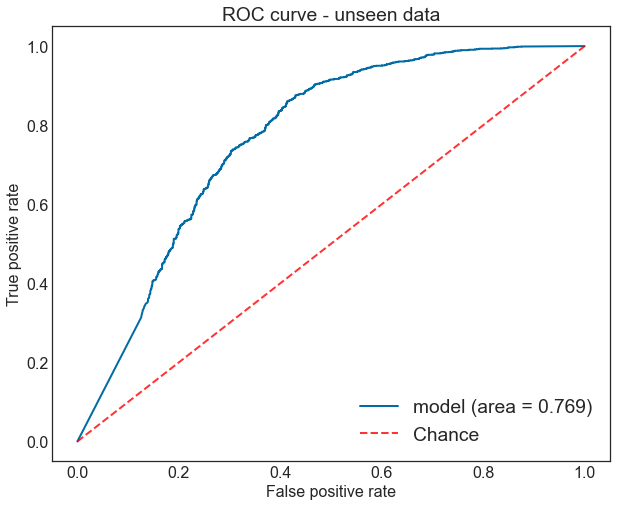

In [214]:
# https://www.dlology.com/blog/simple-guide-on-how-to-generate-roc-plot-for-keras-classifier/
fig, ax = plt.subplots(1, figsize=(10, 8))
ax.plot(fpr_keras, tpr_keras, label='model (area = {:.3f})'.format(auc_keras))
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
ax.set_xlabel('False positive rate')
ax.set_ylabel('True positive rate')
ax.set_title('ROC curve - unseen data')
plt.legend(loc='best')
#plt.show()
# plt.savefig('../images/ROC_500epochs_newdata_ID_NM_MT_fixed.png') 

In [203]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def compute_plot_confusion_matrix(y_true_class, y_pred_class, classes):
    confmat = confusion_matrix(y_true_class, y_pred_class, labels=range(2))
    confmat = confmat / confmat.sum(0).astype(float)
    df_cm = pd.DataFrame(confmat, columns = classes)
    plt.figure(figsize = (12,10))
    sns.heatmap(df_cm, annot=True, fmt=".2f")
    return confmat

In [204]:
confmat = confusion_matrix(y, predictions_binary)
confmat

array([[ 989,  743],
       [ 255, 1697]])

In [215]:
x_test_images = np.concatenate([x for x, y in new_test], axis=0)

In [216]:
predictions_binary_vec = predictions_binary.reshape(-1,)

In [217]:
ys = np.column_stack((predictions_binary_vec, y))

In [228]:
y_predictions_df = pd.DataFrame(ys, columns=['predict', 'actual'])

In [230]:
y_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3684 entries, 0 to 3683
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   predict  3684 non-null   int32
 1   actual   3684 non-null   int32
dtypes: int32(2)
memory usage: 28.9 KB


In [219]:
# create pandas series first
images = pd.Series(list(x_test_images))

In [220]:
images.shape

(3684,)

In [231]:
y_predictions_df = y_predictions_df.replace(to_replace=0, value="est_camp") #['Established Campground', 'Wild Camping']

In [232]:
y_predictions_df = y_predictions_df.replace(to_replace=1, value="wild_camp") #['Established Campground', 'Wild Camping']

In [234]:
y_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3684 entries, 0 to 3683
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   predict  3684 non-null   object
 1   actual   3684 non-null   object
dtypes: object(2)
memory usage: 57.7+ KB


In [235]:
y_predictions_df['image'] = images

In [236]:
y_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3684 entries, 0 to 3683
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   predict  3684 non-null   object
 1   actual   3684 non-null   object
 2   image    3684 non-null   object
dtypes: object(3)
memory usage: 86.5+ KB


In [237]:
wrong_imgs = y_predictions_df[y_predictions_df['predict'] != y_predictions_df['actual']]

In [241]:
wrong_imgs[wrong_imgs['predict'] == 'est_camp']

,predict,actual,image
1748,est_camp,wild_camp,"[[[31.321121, 39.658188, 31.171234], [23.53059..."
1749,est_camp,wild_camp,"[[[95.106476, 95.27098, 74.70558], [108.31781,..."
1751,est_camp,wild_camp,"[[[31.321121, 39.658188, 31.171234], [23.53059..."
1760,est_camp,wild_camp,"[[[76.670105, 84.670105, 68.670105], [71.53302..."
1761,est_camp,wild_camp,"[[[35.802673, 46.333923, 43.70111], [43.651016..."
...,...,...,...
3565,est_camp,wild_camp,"[[[128.62834, 111.32901, 81.79732], [122.1505,..."
3566,est_camp,wild_camp,"[[[142.33304, 151.66608, 141.99956], [142.1015..."
3567,est_camp,wild_camp,"[[[114.497986, 115.63237, 104.332596], [115.10..."
3568,est_camp,wild_camp,"[[[79.86694, 85.63414, 75.267395], [87.012085,..."


In [240]:
wrong_imgs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 4 to 3571
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   predict  998 non-null    object
 1   actual   998 non-null    object
 2   image    998 non-null    object
dtypes: object(3)
memory usage: 31.2+ KB


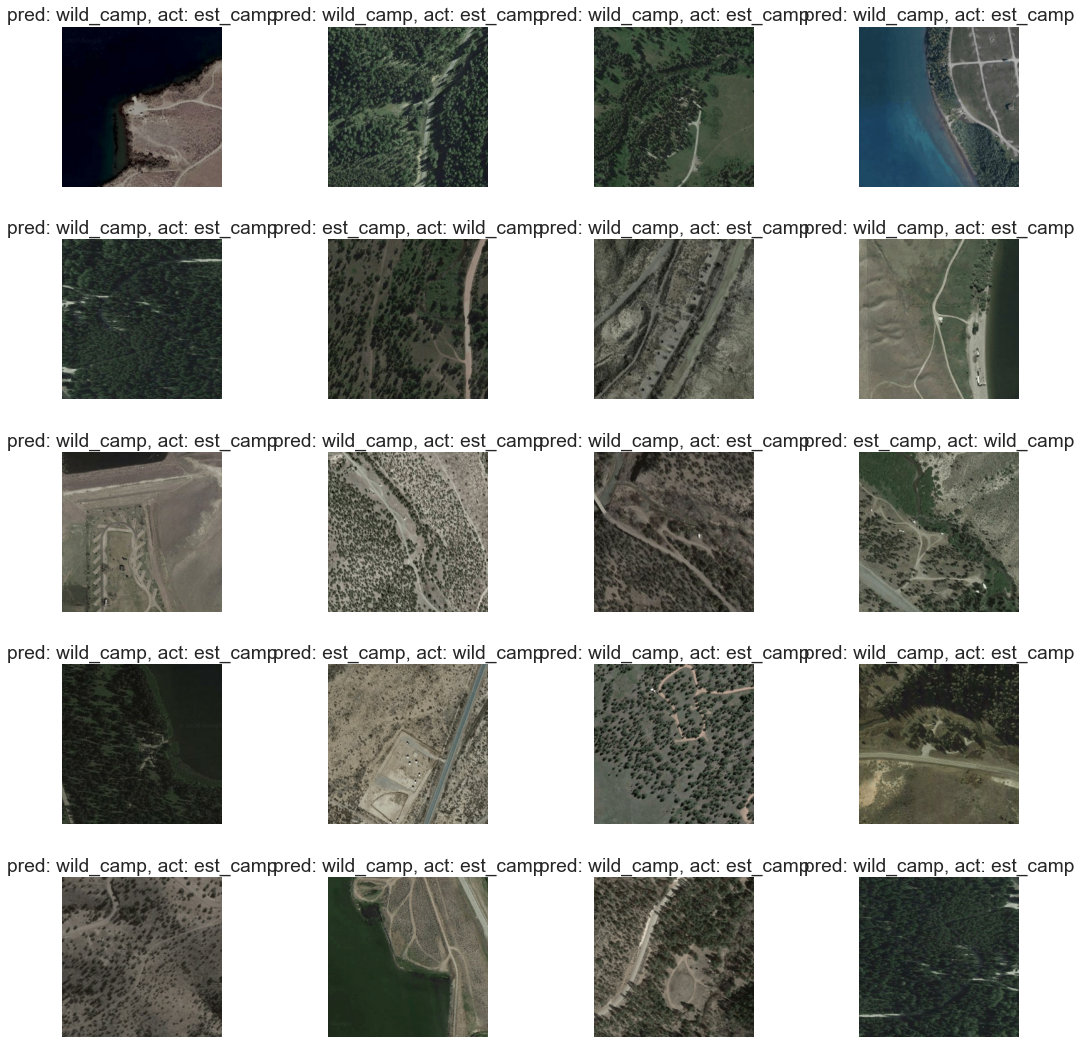

In [242]:
# plot some
from random import choices
num_samples = 20
samples = choices(range(len(wrong_imgs)), k=num_samples)

fig, axs = plt.subplots(int(num_samples/4), 4, figsize=(15,15))

for i, ax in zip(samples, axs.flatten()):
  # print(i)
#   #print(ax[i,0])
  img = wrong_imgs.iloc[i]['image'].astype("uint8")
  pred = wrong_imgs.iloc[i]['predict']
  act = wrong_imgs.iloc[i]['actual']
  ax.imshow(img)
  ax.set_title(f'pred: {pred}, act: {act}')
  ax.axis('off')
plt.tight_layout();
